In [1]:
##This is to analyze the sequences I get back from the libraries and eventually plot in PyMol figures. I am going to import the
##Nucleotide alignment after exporting a FASTA file from Geneious. This is made by aligning the chromatograms from Sanger reads.

#Importing the necessary libraries
import sys
from os import listdir
from os.path import isfile, join

import re

import pandas as pd

import Bio
from Bio import AlignIO
from Bio import SeqUtils

from pylab import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import kendalltau

#Setting matplotlib to be inline, and setting the fonttype for the pdf export to be consistent in Illustrator.
%matplotlib inline

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Set the root directory
root_dir = './Data';

In [2]:
###Classes defined###
class FASTAClass:
    def __init__(self, id, seq):        
        self.id = id        
        self.seq = seq

###Functions used here###
def sequenceCleaner(mutants):
    # Create our hash table to add the sequences
    seqHash={}
    seqUnique = []

    # Using the Biopython fasta parse we can read our fasta input
    for seq_record in mutants[1:]:
        # Take the current sequence
        sequence = str(seq_record.seq).upper()
        # If the sequence passed in the test "is it clean?" and it isn't in the
        # hash table, the sequence and its id are going to be in the hash
        if sequence not in seqHash:
            seqHash[sequence] = seq_record.id
        # If it is already in the hash table, we're just gonna concatenate the ID
        # of the current sequence to another one that is already in the hash table
        else:
            seqHash[sequence] += "_" + seq_record.id.split("_")[-3].split("-")[-1]
    
    # Making the final FASTAClass for the unique sequences
    seqUnique.append(FASTAClass(mutants[0].id, mutants[0].seq))
    for sequence in seqHash:
        seqUnique.append(FASTAClass(seqHash[sequence], sequence))
            
    return seqUnique

In [3]:
#Set the data directory
data_dir = '';

#Pick a test data file
data_file = root_dir+data_dir
#print(root_dir+data_dir)

#Printing file list
fileList = [f for f in listdir(root_dir+data_dir) if f.endswith(".fasta")]
print("Sequence files:")
print("\n".join(fileList))

Sequence files:
E-021_TMH4-6_v3-org_nucl-align.fasta
E-021_TMH4-6_v3-org_nucl-align_unique.fasta
E-021_TMH4-6_v3-sort04_nucl-align.fasta
E05973_TMH10-12_v1-v2-sort04-05-05a_v3-sort04a-05_v4-sort04_all.fasta
E05973_TMH10-12_v1-v2-sort04-05-05a_v3-sort04a-05_v4-sort04_all_unique-translate.fasta
E05973_TMH10-12_v1-v2-sort04-05-05a_v3-sort04a-05_v4-sort04_all_unique.fasta
E05973_TMH4-6_v1-sort04_v3-sort04_v4-sort04_all.fasta
E05973_TMH4-6_v1-sort04_v3-sort04_v4-sort04_all_unique-translate.fasta
E05973_TMH4-6_v1-sort04_v3-sort04_v4-sort04_all_unique.fasta
plateSeq03_E05973_TMH10-12_Mutlib-v1-v2-s04b_corrected.fasta
plateSeq03_E05973_TMH10-12_Mutlib-v1-v2-s04b_corrected_unique.fasta


In [4]:
##Input an alignment for the analysis, and run my pre-cleaning on the Alignment.

alignFile = data_file+"/E05973_TMH4-6_v1-sort04_v3-sort04_v4-sort04_all.fasta"
nuclAlignment = AlignIO.read(open(alignFile), "fasta")
print("Alignment length %i" % nuclAlignment.get_alignment_length())
print("Alignment size %i" % len(nuclAlignment))
#for record in nuclAlignment :
#    print(record.seq[:120])

#print(nuclAlignment[1].seq)
#print(nuclAlignment[1].seq.ungap("-").translate())

reducedNuclAlignment = []
for record in nuclAlignment:
    if (record.seq.count("-") == 0):
        reducedNuclAlignment.append(record)

print("Reduced alignment size %i" % len(reducedNuclAlignment))
#for record in reducedNuclAlignment:
#    print(record.seq.translate())

reducedAaAlignment = []
for record in reducedNuclAlignment:
    reducedAaAlignment.append(FASTAClass(record.id, record.seq.translate()))

cleanedAaAlignment = sequenceCleaner(reducedAaAlignment)
cleanedNuclAlignment = sequenceCleaner(reducedNuclAlignment)
print("Cleaned Aa alignment size %i" % len(cleanedAaAlignment))
print("Cleaned Nucl alignment size %i" % len(cleanedNuclAlignment))
print(cleanedAaAlignment[0].id, cleanedAaAlignment[0].seq)

#print(reducedAaAlignment[-1].id.split("_")[-3])
#print(cleanedAaAlignment[-2].id)

outputUniqueNucl = alignFile[:-6]+"_unique.fasta"
outputHandle = open(outputUniqueNucl,"w")
for sequence in cleanedNuclAlignment:
    outputHandle.write(">"+str(sequence.id)+"\n"+str(sequence.seq)+"\n")
outputHandle.close()
print("Unique sequences are printed in:\t", outputUniqueNucl)

outputUniqueAa = alignFile[:-6]+"_unique-translate.fasta"
outputHandle = open(outputUniqueAa,"w")
for sequence in cleanedAaAlignment:
    outputHandle.write(">"+str(sequence.id)+"\n"+str(sequence.seq)+"\n")
outputHandle.close()
print("Unique sequences are printed in:\t", outputUniqueAa)

Alignment length 483
Alignment size 91
Reduced alignment size 91
Cleaned Aa alignment size 62
Cleaned Nucl alignment size 64
YALI0E05973[TMH4-6]_ROI YHSWSLTLVIMAGLPIIVLVAMGVAPRLQRHFRDYKGVITDASVMIDWSMSGLQHVKLSNGEKKQMSILQYQMHLATICYMKFTTWSAAQQAFMQVLALIMFVQGFWFGAKQVQIGNLTAGAVMTCFFSAMAVTSHIASITGQMMSIMKAMVSAGLVNQLI
Unique sequences are printed in:	 ./Data/E05973_TMH4-6_v1-sort04_v3-sort04_v4-sort04_all_unique.fasta
Unique sequences are printed in:	 ./Data/E05973_TMH4-6_v1-sort04_v3-sort04_v4-sort04_all_unique-translate.fasta


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

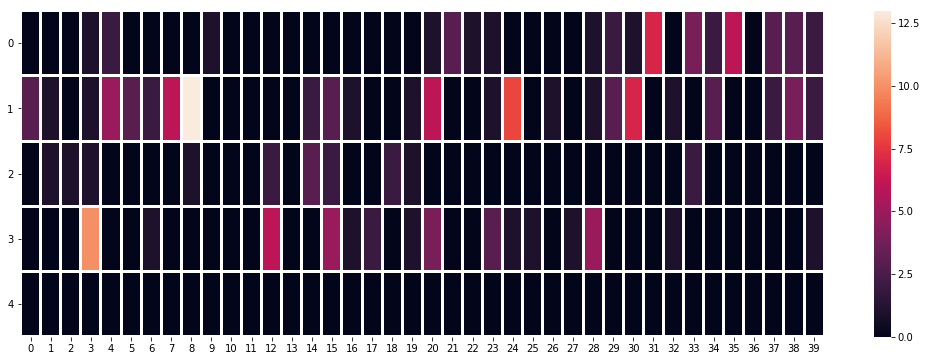

In [5]:
##I am going to write code that gives the number of variation in each column.
#mutantCounts = [[0 for col in range(len(cleanedTestAlignment[0].seq))] for row in range(len(cleanedTestAlignment)-1)]
mutantCounts = [0 for col in range(len(cleanedAaAlignment[0].seq))]

#print(len(cleanedTestAlignment[1].seq))

seqCount = 0
for record in cleanedAaAlignment[1:]:
    residueCount = 0
    for residue in record.seq:
        #print(residue, residueCount, seqCount)
        if residue != cleanedAaAlignment[0].seq[residueCount]:
            mutantCounts[residueCount] += 1
        residueCount += 1
    seqCount +=1

#print(seqCount, residueCount)
#print(mutantCounts)

heatMapMutations = [[0 for i in range(40)] for j in range(len(cleanedAaAlignment[0].seq)//40+1)]

for iterCount in range(len(cleanedAaAlignment[0].seq)):
    #print(iterCount)
    heatMapMutations[(iterCount)//40][(iterCount)%40] = mutantCounts[iterCount]
#print(heatMapMutations)

fig1 = figure(figsize=(18,6))
ax = sns.heatmap(heatMapMutations, linewidths=2)
plt.yticks(rotation=0)
#savefig(root_dir+'/heatMap_TMH4-6_all_uniques.pdf', dpi=300, transparent=True)

In [6]:
##I am going to output a file that can be ingested into PyMol directly by the <data2b_res.py> script. I need to remember that the order is "ChainID, 3-letter-aa, resi, b-factor"
outputFile = alignFile.split(".")[1]+"_mutantCounts.csv"
print(outputFile)

startTMH4to6 = 199
startTMH10to12 = 851
chainID = "A"
mutantCountsPyMolList = []
resiCount = 0
for resiCount in range(len(cleanedAaAlignment[0].seq)):
    mutantCountsPyMolList.append([chainID, (startTMH4to6+resiCount), SeqUtils.seq3(cleanedAaAlignment[0].seq[resiCount]).upper(), mutantCounts[resiCount]])
#print(mutantCountsPyMolList)
#print(len(cleanedAaAlignment[0].seq))
mutantCountsPyMol = pd.DataFrame.from_records(mutantCountsPyMolList)
#print(mutantCountsPyMol)

#mutantCountsPyMol.to_csv('.'+outputFile, sep='\t', encoding='utf-8', index=False, header=False)

/Data/E05973_TMH4-6_v1-sort04_v3-sort04_v4-sort04_all_mutantCounts.csv


In [7]:
SeqUtils.seq3("ARG").upper()

print("Max mutants/pos: ", max(mutantCounts[:]), "\nSum of unique mutations: ", sum(mutantCounts))
#len(mutantCounts)
#print(range(161))

Ticks = list(range(max(mutantCounts[:])+1))
print(Ticks)

#read_file = data_file+"/Fungiv2p1_hmmalign-hhfilter_graphs.csv"
read_file = data_file+"/Fungiv2p1_hmmalign-hhfilter-focus-mod_cleaned_190906.csv"
orthologAlign = pd.read_csv(read_file)
print(orthologAlign['Identity'].values[startTMH4to6-1:startTMH4to6-1+len(mutantCounts)])
print(orthologAlign[startTMH4to6-1:startTMH4to6+2])

Max mutants/pos:  13 
Sum of unique mutations:  180
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.27 0.14 0.72 0.68 0.18 0.83 0.71 0.8  0.67 0.29 0.53 0.35 0.23 0.22
 0.9  0.24 0.15 0.12 0.19 0.21 0.16 0.12 0.19 0.14 0.23 0.16 0.12 0.17
 0.11 0.34 0.13 0.21 0.11 0.12 0.42 0.21 0.1  0.12 0.34 0.2  0.09 0.7
 0.31 0.33 0.14 0.23 0.14 0.18 0.38 0.2  0.15 0.32 0.68 0.18 0.36 0.85
 0.78 0.22 0.43 0.69 0.4  0.24 0.11 0.09 0.84 0.12 0.09 0.14 0.31 0.08
 0.09 0.13 0.22 0.11 0.12 0.25 0.2  0.1  0.11 0.33 0.11 0.21 0.24 0.3
 0.12 0.12 0.2  0.29 0.16 0.33 0.14 0.45 0.13 0.13 0.2  0.46 0.16 0.18
 0.18 0.17 0.43 0.91 0.73 0.49 0.77 0.91 0.68 0.47 0.87 0.2  0.12 0.7
 0.57 0.16 0.1  0.72 0.14 0.18 0.19 0.28 0.67 0.19 0.69 0.25 0.45 0.32
 0.94 0.38 0.55 0.41 0.68 0.16 0.51 0.15 0.29 0.17 0.28 0.25 0.12 0.16
 0.19 0.54 0.36 0.18 0.23 0.28 0.48 0.15 0.73 0.79 0.29 0.15 0.69 0.24
 0.17 0.12 0.71 0.1  0.11 0.26 0.16]
     Position  Identity  Mean Hydrophobicity  Mean PI  Sequence Logo
198       199    

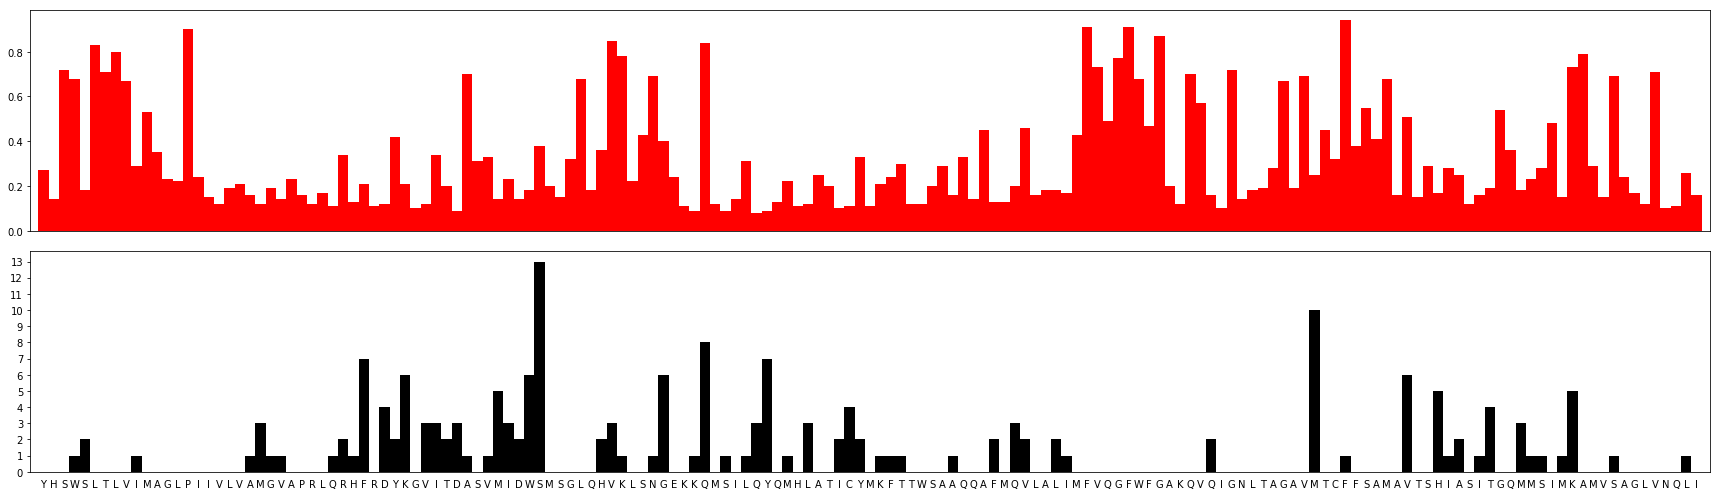

In [8]:
fig2 = figure(figsize=(24,7))
ax1 = subplot(211)
ax1 = plt.bar(range(161), (orthologAlign['Identity'].values[startTMH4to6-1:startTMH4to6-1+len(mutantCounts)]), width=1, align='center', color="red")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) #No labels are shown
plt.margins(x=0.005)
ax2 = subplot(212)
ax2 = plt.bar(range(161), (mutantCounts), width=1, align='center', color="black", tick_label=cleanedAaAlignment[0].seq)
plt.yticks(Ticks)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)         # ticks along the top edge are off
plt.margins(x=0.005)
plt.tight_layout()

#savefig(root_dir+'/barMap_TMH4-6_all_uniques_190906.pdf', dpi=300, transparent=True)

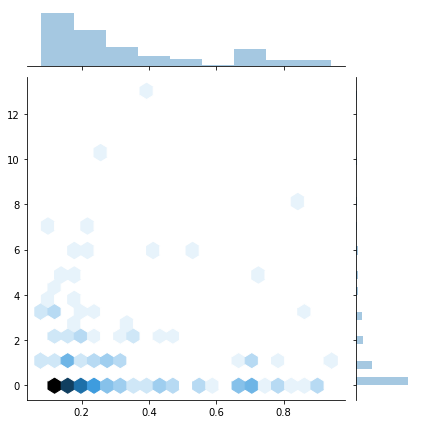

In [13]:
sns.jointplot(x=(orthologAlign['Identity'].values[startTMH4to6-1:startTMH4to6-1+len(mutantCounts)]), y=(mutantCounts), kind="hex")

[2 2 1 1 1 0 2 2 2 0] 
Lambda =  1.1180124223602483 	Size =  161
[95, 28, 13, 10, 3, 3, 4, 2, 1, 0, 1, 0, 0, 1]


(-1, 16)

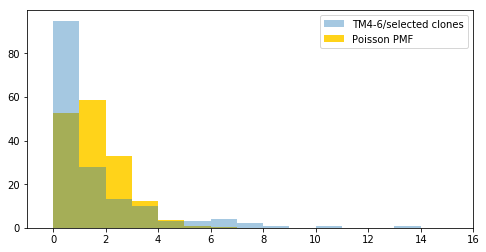

In [9]:
##I am going to Poisson sample the number of mutations that are going to be drawn for this range.
##I need to add an extra bin since the this list is a right limit of bins and it inappropriately counts the highest mutCount values in the bin.
bins = list(range(max(mutantCounts)+2))

mutCountsPoisson = np.random.poisson(sum(mutantCounts)/len(mutantCounts), len(mutantCounts))
mutPoissonPmf = len(mutantCounts)*poisson.pmf(bins, sum(mutantCounts)/len(mutantCounts))
#print(mutPoissonPmf)

print(mutCountsPoisson[:10], "\nLambda = ", sum(mutantCounts)/len(mutantCounts), "\tSize = ", len(mutCountsPoisson))
#sns.palplot(sns.color_palette()[1])

histMutantCounts, bin_edges = np.histogram(mutantCounts, bins)
print(histMutantCounts.tolist()[:])


fig3 = figure(figsize=(8,4))
ax2 = plt.bar(bins, mutPoissonPmf, label="Poisson PMF", color="#FFD31A", align="edge", width=1)
#ax2 = plt.bar(bins, mutPoissonPmf, label="Poisson PMF", color=sns.color_palette()[1], align="edge", width=1)
#ax2 = sns.distplot(mutCountsPoisson, bins, kde=False, label="Poisson distribution")
#ax2 = sns.barplot(bins, histMutantCounts.tolist()[:], label="TM4-6/selected clones")
ax2 = sns.distplot(mutantCounts, bins, kde=False, label="TM4-6/selected clones")
ax2.legend()
xlim((-1,bins[-1]+2))

#savefig(root_dir+'/mutCountPosHist_TMH4-6_all_uniques_190820.pdf', dpi=300, transparent=True)

In [10]:
#print(bin_edges)
#print(bins[:-1], histMutantCounts.tolist())
print(np.vstack((bins[:-1], histMutantCounts.tolist())).T.astype(int))
#np.savetxt("histMutCount_TM4-6-all_190820.csv", np.vstack((bins[:-1], histMutantCounts.tolist())).T.astype(int), delimiter=",")

[[ 0 95]
 [ 1 28]
 [ 2 13]
 [ 3 10]
 [ 4  3]
 [ 5  3]
 [ 6  4]
 [ 7  2]
 [ 8  1]
 [ 9  0]
 [10  1]
 [11  0]
 [12  0]
 [13  1]]


(0, 8)

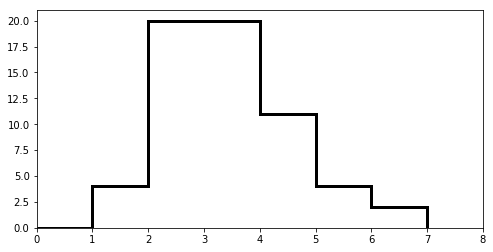

In [12]:
##I am going to build a distribution of mutations per clone, rather than mutations per position.
mutantCloneCounts = []
for iterate in range(len(cleanedAaAlignment)-1):
    #print(iterate)
    expression = (1 for a, b in zip(cleanedAaAlignment[0].seq, cleanedAaAlignment[iterate+1].seq) if a != b)
    mutantCloneCounts.append(np.sum(np.fromiter(expression, int)))
countBins = list(range(max(mutantCloneCounts)+2))

fig4 = figure(figsize=(8,4))
ax4 = sns.distplot(mutantCloneCounts, countBins, kde=False, color="black", label="TM4-6 mutations per clone", 
                   hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "k"})
xlim((0,max(mutantCloneCounts)+2))

#savefig(root_dir+'/mutantCountCloneHist_TMH4-6_all_uniques_190503.pdf', dpi=300, transparent=True)